# Default Tagger

In [1]:
import nltk
from nltk.corpus import brown
tags = [tag for (word, tag) in brown.tagged_words(categories = 'news')]

In [2]:
nltk.FreqDist(tags).most_common(5)

[('NN', 13162), ('IN', 10616), ('AT', 8893), ('NP', 6866), (',', 5133)]

In [3]:
[f'{w:5}{f/len(tags):8.3%}' for w,f in nltk.FreqDist(tags).most_common(5)]

['NN    13.089%',
 'IN    10.558%',
 'AT     8.844%',
 'NP     6.828%',
 ',      5.105%']

In [4]:
nltk.FreqDist(tags).max()

'NN'

In [5]:
raw = 'I do not like green eggs and ham.'
tokens = nltk.word_tokenize(raw)
tokens

['I', 'do', 'not', 'like', 'green', 'eggs', 'and', 'ham', '.']

In [6]:
default_tagger = nltk.DefaultTagger('NN')

In [7]:
print(default_tagger.tag(tokens))

[('I', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('green', 'NN'), ('eggs', 'NN'), ('and', 'NN'), ('ham', 'NN'), ('.', 'NN')]


In [8]:
tagged_sents = brown.tagged_sents(categories='news')
print(tagged_sents[:1])

[[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')]]


In [9]:
default_tagger.evaluate(tagged_sents)

0.13089484257215028

# Regular Expression Tagger

In [10]:
patterns = [
    ('.*ing$','VBG'),
    ('.*ed$','VBD'),
    ('.*es$','VBZ'),
    ('.*ould$','MD'),
    ('.*\'s$','NN$'),
    ('.*s$','NNS'),
    ('^-?[0-9]+(.[0-9]+)?$','CD'),
    ('.*','NN')
]
regexp_tagger = nltk.RegexpTagger(patterns)

In [11]:
sents = brown.sents(categories='news')
print(regexp_tagger.tag(sents[3]))

[('``', 'NN'), ('Only', 'NN'), ('a', 'NN'), ('relative', 'NN'), ('handful', 'NN'), ('of', 'NN'), ('such', 'NN'), ('reports', 'NNS'), ('was', 'NNS'), ('received', 'VBD'), ("''", 'NN'), (',', 'NN'), ('the', 'NN'), ('jury', 'NN'), ('said', 'NN'), (',', 'NN'), ('``', 'NN'), ('considering', 'VBG'), ('the', 'NN'), ('widespread', 'NN'), ('interest', 'NN'), ('in', 'NN'), ('the', 'NN'), ('election', 'NN'), (',', 'NN'), ('the', 'NN'), ('number', 'NN'), ('of', 'NN'), ('voters', 'NNS'), ('and', 'NN'), ('the', 'NN'), ('size', 'NN'), ('of', 'NN'), ('this', 'NNS'), ('city', 'NN'), ("''", 'NN'), ('.', 'NN')]


In [12]:
regexp_tagger.evaluate(tagged_sents)

0.20326391789486245

# Lookup Tagger

In [13]:
fd = nltk.FreqDist(brown.words(categories='news'))

In [14]:
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
cfd['the']

FreqDist({'AT': 5558, 'AT-TL': 18, 'AT-HL': 4})

In [15]:
likely_tags = dict((word,cfd[word].max())
                  for (word,_) in fd.most_common(50))

In [16]:
print(likely_tags)

{'the': 'AT', ',': ',', '.': '.', 'of': 'IN', 'and': 'CC', 'to': 'TO', 'a': 'AT', 'in': 'IN', 'for': 'IN', 'The': 'AT', 'that': 'CS', '``': '``', 'is': 'BEZ', 'was': 'BEDZ', "''": "''", 'on': 'IN', 'at': 'IN', 'with': 'IN', 'be': 'BE', 'by': 'IN', 'as': 'CS', 'he': 'PPS', 'said': 'VBD', 'his': 'PP$', 'will': 'MD', 'it': 'PPS', 'from': 'IN', 'are': 'BER', ';': '.', 'an': 'AT', 'has': 'HVZ', '--': '--', 'had': 'HVD', 'who': 'WPS', 'have': 'HV', 'not': '*', 'Mrs.': 'NP', 'were': 'BED', 'this': 'DT', 'which': 'WDT', 'would': 'MD', 'their': 'PP$', 'been': 'BEN', 'they': 'PPSS', 'He': 'PPS', 'one': 'CD', 'I': 'PPSS', 'but': 'CC', 'its': 'PP$', 'or': 'CC'}


In [17]:
lookup_tagger = nltk.UnigramTagger(model=likely_tags)
lookup_tagger.evaluate(tagged_sents)

0.40313662310798176

In [18]:
likely_tags100 = dict((word,cfd[word].max())
                     for (word, _) in fd.most_common(100))
nltk.UnigramTagger(model=likely_tags100).evaluate(tagged_sents)

0.45578495136941344

In [19]:
likely_tags200 = dict((word,cfd[word].max())
                     for (word, _) in fd.most_common(200))
nltk.UnigramTagger(model=likely_tags200).evaluate(tagged_sents)

0.5060962269029576

In [20]:
likely_tags300 = dict((word,cfd[word].max())
                     for (word, _) in fd.most_common(300))
nltk.UnigramTagger(model=likely_tags300).evaluate(tagged_sents)

0.539819400521113

In [21]:
precision = [nltk.UnigramTagger(model=dict((word,cfd[word].max())
                                          for (word,_) in fd.most_common(i))).evaluate(tagged_sents)
            for i in range(100,len(fd.most_common()),100)]

Text(0, 0.5, 'precision')

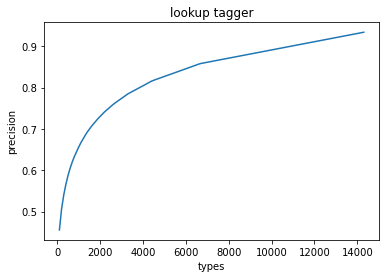

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(100,len(fd.most_common()),100),precision)
plt.title('lookup tagger')
plt.xlabel('types')
plt.ylabel('precision')

In [23]:
print(lookup_tagger.tag(sents[3]))

[('``', '``'), ('Only', None), ('a', 'AT'), ('relative', None), ('handful', None), ('of', 'IN'), ('such', None), ('reports', None), ('was', 'BEDZ'), ('received', None), ("''", "''"), (',', ','), ('the', 'AT'), ('jury', None), ('said', 'VBD'), (',', ','), ('``', '``'), ('considering', None), ('the', 'AT'), ('widespread', None), ('interest', None), ('in', 'IN'), ('the', 'AT'), ('election', None), (',', ','), ('the', 'AT'), ('number', None), ('of', 'IN'), ('voters', None), ('and', 'CC'), ('the', 'AT'), ('size', None), ('of', 'IN'), ('this', 'DT'), ('city', None), ("''", "''"), ('.', '.')]


In [24]:
lookup_tagger = nltk.UnigramTagger(model=likely_tags,
                                  backoff = nltk.DefaultTagger('NN'))

In [25]:
print(lookup_tagger.tag(sents[3]))

[('``', '``'), ('Only', 'NN'), ('a', 'AT'), ('relative', 'NN'), ('handful', 'NN'), ('of', 'IN'), ('such', 'NN'), ('reports', 'NN'), ('was', 'BEDZ'), ('received', 'NN'), ("''", "''"), (',', ','), ('the', 'AT'), ('jury', 'NN'), ('said', 'VBD'), (',', ','), ('``', '``'), ('considering', 'NN'), ('the', 'AT'), ('widespread', 'NN'), ('interest', 'NN'), ('in', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('the', 'AT'), ('number', 'NN'), ('of', 'IN'), ('voters', 'NN'), ('and', 'CC'), ('the', 'AT'), ('size', 'NN'), ('of', 'IN'), ('this', 'DT'), ('city', 'NN'), ("''", "''"), ('.', '.')]


In [26]:
lookup_tagger.evaluate(tagged_sents)

0.534011575869682